In [166]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Reading Dataset

In [167]:
Power = pd.read_csv("power_actual.csv")
Power.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


In [168]:
Power_copy = pd.read_csv("power_actual2.csv")
Power_copy.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


In [169]:
Actual_weather = pd.read_csv("weather_actuals.csv")
Actual_weather.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,...,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [170]:
Forecast_weather = pd.read_csv("weather_forecast.csv")
Forecast_weather.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [171]:
Actual_weather.shape

(13619, 31)

In [172]:
Forecast_weather.shape

(648, 31)

In [173]:
#checking the missing data in the given dataset
total = Actual_weather.isnull().sum().sort_values(ascending=False)
percent = (Actual_weather.isnull().sum()/Actual_weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
qpf,9875,0.72509
wind_chill,9875,0.72509
snow,9875,0.72509
pop,9875,0.72509
fctcode,9875,0.72509
precip_accumulation,9875,0.72509
heat_index,9875,0.72509
precip_type,7129,0.52346
apparent_temperature,0,0.00000
temperature,0,0.00000


In [174]:
#checking the missing data in the given dataset
total = Forecast_weather.isnull().sum().sort_values(ascending=False)
percent = (Forecast_weather.isnull().sum()/Forecast_weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
qpf,648,1.000000
wind_chill,648,1.000000
snow,648,1.000000
pop,648,1.000000
fctcode,648,1.000000
precip_accumulation,648,1.000000
heat_index,648,1.000000
precip_type,534,0.824074
apparent_temperature,0,0.000000
temperature,0,0.000000


In [175]:
columns = Power.columns.tolist()
for i in columns:
    print(i)
    print(Power[i].unique())

Unnamed: 0
[    0     1     2 ... 70077 70078 70079]
datetime
['2017-10-01 00:00:00' '2017-10-01 00:15:00' '2017-10-01 00:30:00' ...
 '2019-09-30 23:15:00' '2019-09-30 23:30:00' '2019-09-30 23:45:00']
ghi
[ 0. nan]
gti
[ 0. nan]
power
[0.00000e+00 8.00000e-02 3.40000e-01 ... 5.60224e+03 3.92693e+03
 2.61160e+03]


if we observe above output we can notice "ghi" & "gti" does'nt consist any data and data Unnamed:0 can be dropped

In [176]:
#Dropping the above mentioned columns,
Power = Power.drop(['ghi','gti','Unnamed: 0'],axis=1)

In [177]:
#Dropping the above mentioned columns,
Power_copy = Power_copy.drop(['ghi','gti','Unnamed: 0'],axis=1)

In [178]:
Power.columns

Index(['datetime', 'power'], dtype='object')

In [179]:
Power_copy.columns

Index(['datetime', 'power'], dtype='object')

In [180]:
Power_copy.head()

,datetime,power
0,2017-10-01 00:00:00,0.0
1,2017-10-01 00:15:00,0.0
2,2017-10-01 00:30:00,0.0
3,2017-10-01 00:45:00,0.0
4,2017-10-01 01:00:00,0.0


In [181]:
columns =Actual_weather.columns.tolist()
for i in columns:
    print(i)
    print(Actual_weather[i].unique())
    print('\n')

Unnamed: 0
[    0     1     2 ... 13616 13617 13618]


plant_id
[1]


datetime_utc
['2017-09-30 18:30:00' '2017-09-30 19:30:00' '2017-09-30 20:30:00' ...
 '2019-09-30 15:30:00' '2019-09-30 16:30:00' '2019-09-30 17:30:00']


datetime_local
['2017-10-01 00:00:00' '2017-10-01 01:00:00' '2017-10-01 02:00:00' ...
 '2019-09-30 21:00:00' '2019-09-30 22:00:00' '2019-09-30 23:00:00']


cloud_cover
[ 0.000e+00  9.000e-02  1.400e-01  1.500e-01 -9.999e+03  3.100e-01
  2.500e-01  3.500e-01  2.000e-01  2.400e-01  1.000e-01  2.300e-01
  1.600e-01  1.900e-01  5.800e-01  2.600e-01  3.300e-01  2.200e-01
  2.700e-01  3.000e-02  5.500e-01  1.800e-01  8.000e-02  3.200e-01
  2.900e-01  2.800e-01  5.100e-01  6.300e-01  5.400e-01  7.000e-02
  6.400e-01  6.800e-01  6.700e-01  6.000e-02  9.100e-01  7.900e-01
  5.300e-01  3.800e-01  1.200e-01  2.100e-01  4.700e-01  1.300e-01
  4.000e-02  5.000e-02  1.700e-01  6.200e-01  6.000e-01  6.500e-01
  4.500e-01  4.800e-01  7.200e-01  7.600e-01  4.200e-01  4.300e-01
  3.6

In [182]:
Forecast_weather.columns

Index(['Unnamed: 0', 'plant_id', 'datetime_utc', 'datetime_local',
       'cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_chill', 'wind_gust',
       'heat_index', 'pressure', 'qpf', 'uv_index', 'snow', 'pop', 'fctcode',
       'ozone', 'precip_accumulation', 'precip_intensity',
       'precip_probability', 'precip_type', 'visibility', 'sunrise', 'sunset',
       'icon', 'summary', 'updated_at'],
      dtype='object')

if we have observed above output we have 
1. "Plant_id" is constant
2. features like humidity, wind_chill, heat_index, qpf, snow, pop, fctcode, Precip_accumulation, Precip_type are constant values and null values.
3. The feature like Icon represents the Icon of the Summary.

If you have observed dataset given we can find same features in weather_actuals & weather_forecast. So i have decided to drop all these values from both of the weather Forecast & Actual Weather

In [183]:
Actual_weather = Actual_weather.drop(["Unnamed: 0", 'plant_id','humidity','wind_chill','heat_index', 'qpf', 'snow', 'pop', 'fctcode','precip_accumulation','precip_type'], axis = 1)
Forecast_weather = Forecast_weather.drop(["Unnamed: 0", 'plant_id','humidity','wind_chill','heat_index', 'qpf', 'snow', 'pop', 'fctcode','precip_accumulation','precip_type'], axis = 1)

In [184]:
Actual_weather.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,updated_at
0,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,19.46,308,0.83,-9999.0,1007.90,-9999,-9999.0,-9999.0,-9999.0,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,20.06,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,19.97,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,18.66,270,0.45,-9999.0,1008.12,-9999,-9999.0,-9999.0,-9999.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,17.84,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [185]:
Forecast_weather.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,updated_at
0,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,22.01,101,3.08,6.42,1008.45,0,268.6,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,22.06,105,2.94,6.28,1008.24,0,269.1,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,22.06,106,2.82,6.08,1007.90,0,269.7,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,21.87,106,2.63,5.74,1007.61,0,270.4,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,21.53,100,2.39,5.30,1007.51,0,271.3,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [186]:
Power.isnull().sum()

datetime    0
power       0
dtype: int64

In [187]:
Actual_weather.isnull().sum()

datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
dtype: int64

In [188]:
Forecast_weather.isnull().sum()

datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
dtype: int64

In [189]:
Power.dtypes

datetime     object
power       float64
dtype: object

In [190]:
Actual_weather.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [191]:
Forecast_weather.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [192]:
columns =Forecast_weather.columns.tolist()
for i in columns:
    print(i)
    print(Forecast_weather[i].unique())
    print('\n')

datetime_utc
['2019-09-30 18:30:00' '2019-09-30 19:30:00' '2019-09-30 20:30:00'
 '2019-09-30 21:30:00' '2019-09-30 22:30:00' '2019-09-30 23:30:00'
 '2019-10-01 00:30:00' '2019-10-01 01:30:00' '2019-10-01 02:30:00'
 '2019-10-01 03:30:00' '2019-10-01 04:30:00' '2019-10-01 05:30:00'
 '2019-10-01 06:30:00' '2019-10-01 07:30:00' '2019-10-01 08:30:00'
 '2019-10-01 09:30:00' '2019-10-01 10:30:00' '2019-10-01 11:30:00'
 '2019-10-01 12:30:00' '2019-10-01 13:30:00' '2019-10-01 14:30:00'
 '2019-10-01 15:30:00' '2019-10-01 16:30:00' '2019-10-01 17:30:00'
 '2019-10-01 18:30:00' '2019-10-01 19:30:00' '2019-10-01 20:30:00'
 '2019-10-01 21:30:00' '2019-10-01 22:30:00' '2019-10-01 23:30:00'
 '2019-10-02 00:30:00' '2019-10-02 01:30:00' '2019-10-02 02:30:00'
 '2019-10-02 03:30:00' '2019-10-02 04:30:00' '2019-10-02 05:30:00'
 '2019-10-02 06:30:00' '2019-10-02 07:30:00' '2019-10-02 08:30:00'
 '2019-10-02 09:30:00' '2019-10-02 10:30:00' '2019-10-02 11:30:00'
 '2019-10-02 12:30:00' '2019-10-02 13:30:00' '201

In [193]:
Forecast_weather.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,updated_at
0,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,22.01,101,3.08,6.42,1008.45,0,268.6,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,22.06,105,2.94,6.28,1008.24,0,269.1,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,22.06,106,2.82,6.08,1007.90,0,269.7,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,21.87,106,2.63,5.74,1007.61,0,270.4,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,21.53,100,2.39,5.30,1007.51,0,271.3,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


We have removed all the null values. Now lets merge the Power & Actual_weather datasets.

# Merging the Datasets based on Date_Time

In [194]:
train_data = pd.merge(Power , Actual_weather,  how='inner', left_on=['datetime'], right_on = ['datetime_local'])

In [195]:
train_data.head()

,datetime,power,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,dew_point,wind_bearing,wind_speed,...,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,updated_at
0,2017-10-01 00:00:00,0.0,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,19.46,308,0.83,...,-9999,-9999.0,-9999.0,-9999.0,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,2017-10-01 01:00:00,0.0,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,20.06,-9999,-9999.00,...,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2017-10-01 02:00:00,0.0,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,19.97,-9999,-9999.00,...,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,2017-10-01 03:00:00,0.0,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,18.66,270,0.45,...,-9999,-9999.0,-9999.0,-9999.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,2017-10-01 04:00:00,0.0,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,17.84,-9999,-9999.00,...,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [196]:
train_data.columns

Index(['datetime', 'power', 'datetime_utc', 'datetime_local', 'cloud_cover',
       'apparent_temperature', 'temperature', 'dew_point', 'wind_bearing',
       'wind_speed', 'wind_gust', 'pressure', 'uv_index', 'ozone',
       'precip_intensity', 'precip_probability', 'visibility', 'sunrise',
       'sunset', 'icon', 'summary', 'updated_at'],
      dtype='object')

if we observe datetime, datetime_utc & datetime_local are approx same. As UTC time is Universal time i am going to take Datetime_UTC among all 3.

In [197]:
train_data.drop(['datetime','datetime_local','updated_at','temperature'],axis=1, inplace=True)

# Feature Engineering

# Formatting Date Time Columns

In [198]:
train_data.columns

Index(['power', 'datetime_utc', 'cloud_cover', 'apparent_temperature',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'sunrise', 'sunset', 'icon', 'summary'],
      dtype='object')

In [199]:
train_data[['datetime_utc','sunrise','sunset']].head()

,datetime_utc,sunrise,sunset
0,2017-09-30 18:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
1,2017-09-30 19:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
2,2017-09-30 20:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
3,2017-09-30 21:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07
4,2017-09-30 22:30:00,2017-10-01 00:52:02,2017-10-01 12:45:07


In [200]:
Forecast_weather[['datetime_utc','sunrise','sunset']].head()

,datetime_utc,sunrise,sunset
0,2019-09-30 18:30:00,2019-10-01 00:51:47,2019-10-01 12:45:42
1,2019-09-30 19:30:00,2019-10-01 00:51:47,2019-10-01 12:45:42
2,2019-09-30 20:30:00,2019-10-01 00:51:47,2019-10-01 12:45:42
3,2019-09-30 21:30:00,2019-10-01 00:51:47,2019-10-01 12:45:42
4,2019-09-30 22:30:00,2019-10-01 00:51:47,2019-10-01 12:45:42


As format of all the 3 features are same. If you can observe only the hours are changing but the minutes and seconds columns remained same. so lets extract only hours.

In [201]:
train_data['datetime_utc'] = train_data['datetime_utc'].astype(str)
train_data['datetime_utc'] = pd.to_datetime(train_data['datetime_utc'],dayfirst=True)
train_data['sunrise'] = train_data['sunrise'].astype(str)
train_data['sunrise'] = pd.to_datetime(train_data['sunrise'],dayfirst=True)
train_data['sunset'] = train_data['sunset'].astype(str)
train_data['sunset'] = pd.to_datetime(train_data['sunset'],dayfirst=True)

In [202]:
Forecast_weather['datetime_utc'] = Forecast_weather['datetime_utc'].astype(str)
Forecast_weather['datetime_utc'] = pd.to_datetime(Forecast_weather['datetime_utc'],dayfirst=True)
Forecast_weather['sunrise'] = Forecast_weather['sunrise'].astype(str)
Forecast_weather['sunrise'] = pd.to_datetime(Forecast_weather['sunrise'],dayfirst=True)
Forecast_weather['sunset'] = Forecast_weather['sunset'].astype(str)
Forecast_weather['sunset'] = pd.to_datetime(Forecast_weather['sunset'],dayfirst=True)

In [203]:
train_data['dtUTC_hour'] = train_data['datetime_utc'].dt.hour
train_data['SR_hour'] = train_data['sunrise'].dt.hour
train_data['SS_hour'] = train_data['sunset'].dt.hour

In [204]:
Forecast_weather['dtUTC_hour'] = Forecast_weather['datetime_utc'].dt.hour
Forecast_weather['SR_hour'] = Forecast_weather['sunrise'].dt.hour
Forecast_weather['SS_hour'] = Forecast_weather['sunset'].dt.hour

In [205]:
train_data[['dtUTC_hour','SR_hour','SS_hour']].head()

,dtUTC_hour,SR_hour,SS_hour
0,18,0,12
1,19,0,12
2,20,0,12
3,21,0,12
4,22,0,12


In [206]:
Forecast_weather[['dtUTC_hour','SR_hour','SS_hour']].head()

,dtUTC_hour,SR_hour,SS_hour
0,18,0,12
1,19,0,12
2,20,0,12
3,21,0,12
4,22,0,12


**Lets find how many hours is the sunlight present**

In [207]:
 train_data['sunlight_hours']= train_data['SS_hour'] - train_data['SR_hour']

In [208]:
 Forecast_weather['sunlight_hours']= Forecast_weather['SS_hour'] - Forecast_weather['SR_hour']

In [209]:
 train_data['sunlight_hours'].head()

0    12
1    12
2    12
3    12
4    12
Name: sunlight_hours, dtype: int64

In [210]:
 Forecast_weather['sunlight_hours'].head()

0    12
1    12
2    12
3    12
4    12
Name: sunlight_hours, dtype: int64

**Caluculate how many hours solar plant can generate its Solar Electricity.**

In [211]:
train_data['exposure_duration'] = train_data['dtUTC_hour'] -  train_data['SR_hour']

In [212]:
Forecast_weather['exposure_duration'] = Forecast_weather['dtUTC_hour'] -  Forecast_weather['SR_hour']

In [213]:
train_data['exposure_duration'].head()

0    18
1    19
2    20
3    21
4    22
Name: exposure_duration, dtype: int64

In [214]:
Forecast_weather['exposure_duration'].head()

0    18
1    19
2    20
3    21
4    22
Name: exposure_duration, dtype: int64

In [215]:
train_data.columns

Index(['power', 'datetime_utc', 'cloud_cover', 'apparent_temperature',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'sunrise', 'sunset', 'icon', 'summary', 'dtUTC_hour',
       'SR_hour', 'SS_hour', 'sunlight_hours', 'exposure_duration'],
      dtype='object')

In [216]:
Forecast_weather.columns

Index(['datetime_utc', 'datetime_local', 'cloud_cover', 'apparent_temperature',
       'temperature', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust',
       'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'visibility', 'sunrise', 'sunset', 'icon',
       'summary', 'updated_at', 'dtUTC_hour', 'SR_hour', 'SS_hour',
       'sunlight_hours', 'exposure_duration'],
      dtype='object')

In [217]:
#test3 = pd.merge(Power_copy , Forecast_weather,  join='inner', left_on=['datetime'], right_on = ['datetime_utc'])

In [218]:
#test.head()

# Removing Outliners

In [219]:
pd.get_dummies(train_data)

,power,datetime_utc,cloud_cover,apparent_temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,summary_Light Rain and Humid,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Possible Drizzle,summary_Possible Drizzle and Humid,summary_Possible Light Rain,summary_Possible Light Rain and Humid,summary_Rain,summary_Rain and Humid
0,0.0,2017-09-30 18:30:00,0.00,26.52,19.46,308,0.83,-9999.00,1007.90,-9999,...,0,0,0,0,0,0,0,0,0,0
1,0.0,2017-09-30 19:30:00,0.00,28.78,20.06,-9999,-9999.00,-9999.00,-9999.00,-9999,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2017-09-30 20:30:00,0.00,26.58,19.97,-9999,-9999.00,-9999.00,-9999.00,-9999,...,0,0,0,0,0,0,0,0,0,0
3,0.0,2017-09-30 21:30:00,0.00,23.84,18.66,270,0.45,-9999.00,1008.12,-9999,...,0,0,0,0,0,0,0,0,0,0
4,0.0,2017-09-30 22:30:00,0.00,24.13,17.84,-9999,-9999.00,-9999.00,-9999.00,-9999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,0.0,2019-09-30 13:30:00,0.16,31.66,21.19,40,2.72,4.59,1007.44,0,...,0,0,0,1,0,0,0,0,0,0
13615,0.0,2019-09-30 14:30:00,0.16,30.42,21.35,59,3.24,5.45,1008.25,0,...,0,0,0,1,0,0,0,0,0,0
13616,0.0,2019-09-30 15:30:00,0.18,29.56,21.61,76,3.34,5.83,1008.65,0,...,0,0,0,1,0,0,0,0,0,0
13617,0.0,2019-09-30 16:30:00,0.30,28.97,21.99,88,3.22,5.73,1008.76,0,...,0,0,0,1,0,0,0,0,0,0


**Checking for Outliers**

In [220]:
train_data.describe()

,power,cloud_cover,apparent_temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,dtUTC_hour,SR_hour,SS_hour,sunlight_hours,exposure_duration
count,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,35.255627,-314.005310,25.944639,11.924626,-498.677363,-540.808704,-2393.184251,-733.594065,-2394.989280,-2187.730797,-2396.367775,-2396.398081,-117.086149,11.500404,0.526911,12.469565,11.942654,10.973493
std,557.059759,1744.610028,10.469808,9.129459,2557.943872,2267.247300,4270.333680,4018.429107,4269.320576,4385.706548,4268.545854,4268.528833,1130.763316,6.920243,0.499294,0.580698,0.996624,6.938262
min,0.000000,-9999.000000,3.140000,-20.560000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,0.000000,12.000000,11.000000,-1.000000
25%,0.000000,0.000000,17.310000,5.920000,79.000000,1.620000,1.185000,998.750000,0.000000,236.900000,0.000000,0.000000,3.540000,6.000000,0.000000,12.000000,11.000000,5.000000
50%,0.000000,0.000000,25.540000,10.710000,149.000000,2.410000,3.070000,1006.900000,0.000000,270.800000,0.000000,0.000000,16.090000,12.000000,1.000000,12.000000,12.000000,11.000000
75%,5.810000,0.410000,34.580000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.000000,0.000000,16.090000,17.000000,1.000000,13.000000,13.000000,17.000000
max,15504.750000,1.000000,49.750000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000,23.000000,1.000000,14.000000,14.000000,23.000000


In [221]:
#test_data.head(5)

If you observe Power columns for Q1 & Q2 Quantiles are zero. so lets check the quantile from Q3 quantile i.e 75%

In [222]:
from scipy import stats
from scipy.stats import norm, skew

mu = 35.26 and sigma = 557.04


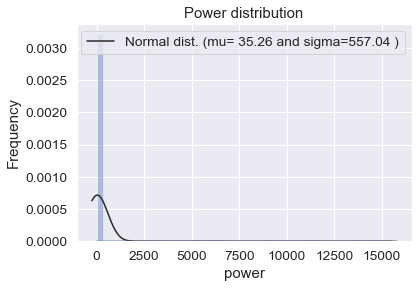

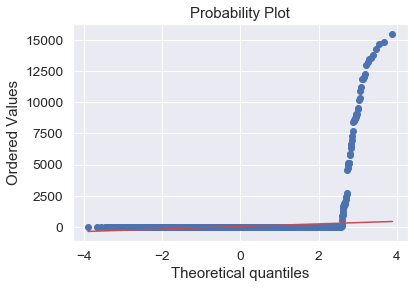

In [223]:
sns.distplot(train_data['power'], fit = norm) #seaborn distplot. Flexibly plot a univariate distribution of observations. This function combines the matplotlib hist function and sns functions. and fitting the curve with in the normal distribution
#get fitted parameters used by function
(mu, sigma) = norm.fit(train_data['power']) 
a= print ('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. (mu= {:.2f} and sigma={:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Power distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['power'], plot=plt)
plt.show()

If you observe the above graph you can clearlerly say it is right skewed. so lets take the percentiles acc to that. 

In [224]:
train_data.power.describe(percentiles=[0.75,0.80,0.85,0.90,0.95,0.99,0.992,0.994,0.996,0.998,0.999])

count    13619.000000
mean        35.255627
std        557.059759
min          0.000000
50%          0.000000
75%          5.810000
80%          8.310000
85%         10.650000
90%         12.470000
95%         14.001000
99%         16.168200
99.2%       16.610560
99.4%       17.145840
99.6%     1823.596160
99.8%     7590.228120
99.9%    11044.371300
max      15504.750000
Name: power, dtype: float64

If we observe above percentile values we can say from 99.4% there is a drastic increase in the frequecy of values. so lets remove outliners according to that.

In [225]:
train_data.loc[(train_data['power'] >= 8.31)]

,power,datetime_utc,cloud_cover,apparent_temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,visibility,sunrise,sunset,icon,summary,dtUTC_hour,SR_hour,SS_hour,sunlight_hours,exposure_duration
10,10.08,2017-10-01 04:30:00,0.00,32.03,18.09,281,2.63,-9999.00,-9999.00,-9999,...,3.54,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,4,0,12,12,4
11,12.09,2017-10-01 05:30:00,0.00,33.31,17.72,278,3.73,-9999.00,-9999.00,-9999,...,3.78,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,5,0,12,12,5
12,13.16,2017-10-01 06:30:00,0.00,36.14,16.43,304,0.96,-9999.00,1008.54,-9999,...,3.91,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,6,0,12,12,6
13,12.42,2017-10-01 07:30:00,0.00,35.63,15.56,291,3.97,-9999.00,-9999.00,-9999,...,4.49,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,7,0,12,12,7
14,10.78,2017-10-01 08:30:00,0.00,35.57,14.50,315,4.67,-9999.00,-9999.00,-9999,...,4.75,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,8,0,12,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13537,14.01,2019-09-27 08:30:00,0.04,38.52,21.78,76,3.39,5.57,1009.24,7,...,16.09,2019-09-27 00:49:43,2019-09-27 12:50:32,clear-day,Clear,8,0,12,12,8
13538,11.58,2019-09-27 09:30:00,0.07,38.42,21.62,72,3.71,5.09,1008.35,5,...,16.09,2019-09-27 00:49:43,2019-09-27 12:50:32,clear-day,Clear,9,0,12,12,9
13581,9.32,2019-09-29 04:30:00,0.08,28.77,23.54,89,2.87,2.92,1011.66,6,...,16.09,2019-09-29 00:50:45,2019-09-29 12:48:06,clear-day,Humid,4,0,12,12,4
13584,14.65,2019-09-29 07:30:00,0.13,31.38,22.44,64,3.33,3.36,1010.58,8,...,16.09,2019-09-29 00:50:45,2019-09-29 12:48:06,partly-cloudy-day,Humid and Partly Cloudy,7,0,12,12,7


In [226]:
train_data.loc[(train_data['power'] >= 16.17)].shape

(137, 23)

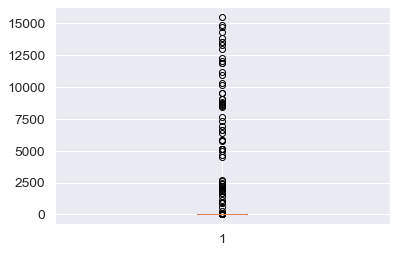

In [227]:
plt.boxplot(train_data.power)
Q1 = train_data.power.quantile(0.00)
Q3 = train_data.power.quantile(0.85)
IQR = Q3 - Q1
train_data = train_data[(train_data.power >= Q1 ) & (train_data.power <= Q3 )]

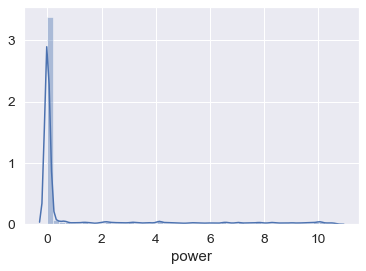

In [228]:
sns.distplot(train_data['power'], hist= True)

In [229]:
plt.show()

mu = 1.42 and sigma = 2.83


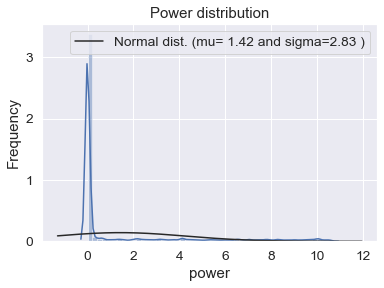

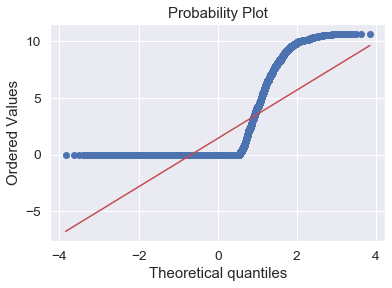

In [230]:
sns.distplot(train_data['power'], fit = norm) #seaborn distplot. Flexibly plot a univariate distribution of observations. This function combines the matplotlib hist function and sns functions. and fitting the curve with in the normal distribution
#get fitted parameters used by function
(mu, sigma) = norm.fit(train_data['power']) 
a= print ('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. (mu= {:.2f} and sigma={:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Power distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['power'], plot=plt)
plt.show()

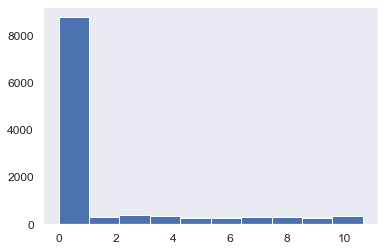

In [231]:
train_data['power'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)

In [67]:
plt.show()

when you compare the plots before outliers and after outliers you can see the difference in Skewness & Normal Distribution

# Exploratory Data Analysis

In [232]:
train_data.columns

Index(['power', 'datetime_utc', 'cloud_cover', 'apparent_temperature',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'sunrise', 'sunset', 'icon', 'summary', 'dtUTC_hour',
       'SR_hour', 'SS_hour', 'sunlight_hours', 'exposure_duration'],
      dtype='object')

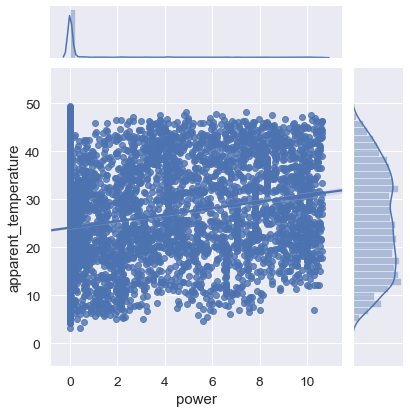

In [236]:
sns.jointplot(x='power', y='apparent_temperature', data=train_data, kind='reg')

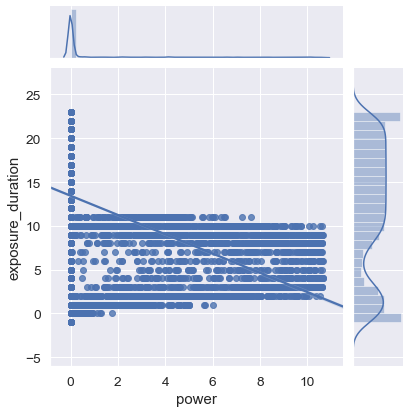

In [237]:
sns.jointplot(x='power', y='exposure_duration', data=train_data, kind='reg')

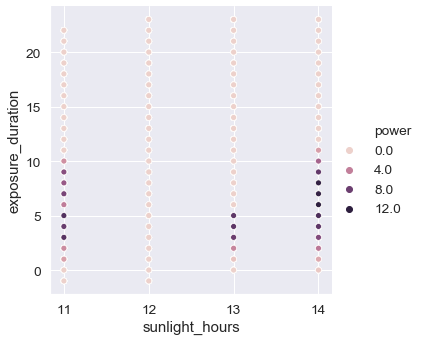

In [241]:
sns.relplot(x='sunlight_hours', y='exposure_duration', hue = 'power',data=train_data)

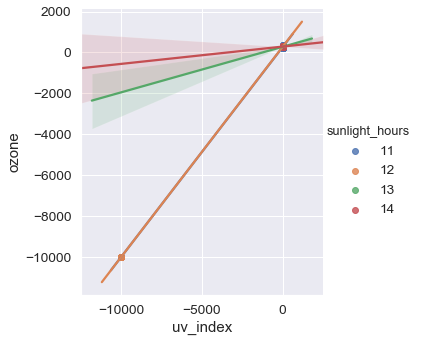

In [247]:
sns.lmplot(x='uv_index',y = 'ozone', hue = 'sunlight_hours', data = train_data)

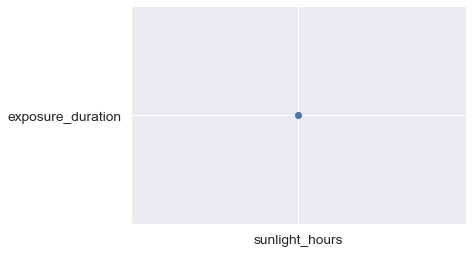

In [238]:
plt.scatter(x= 'sunlight_hours', y ='exposure_duration' )

In [233]:
solar_energy = train_data.groupby('icon')['power'].sum().sort_values()

In [248]:
solar_energy.index

Index(['wind', 'partly-cloudy-night', 'clear-night', 'rain', 'cloudy', 'fog',
       'partly-cloudy-day', 'clear-day'],
      dtype='object', name='icon')

In [249]:
cols = ['wind', 'partly-cloudy-night', 'clear-night', 'rain', 'cloudy', 'fog',
       'partly-cloudy-day', 'clear-day']

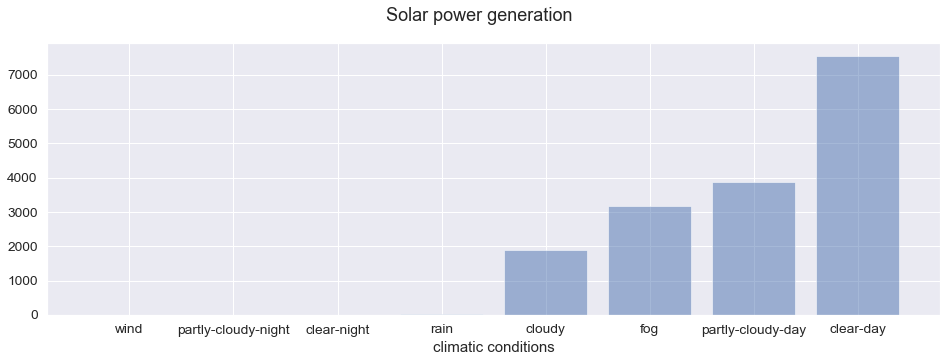

In [250]:
fig = plt.figure(figsize = (16,5))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, solar_energy, align = 'center', alpha = 0.5)
fig.suptitle("Solar power generation")
plt.xticks(x_tick, x_label)
#plt.yticks(fontsize = 20)
plt.xlabel('climatic conditions')
plt.show()

From above graph we came to know at what type of climate is the solar energy be generated

In [251]:
ES = train_data.groupby('datetime_utc')
ES.head(5)

,power,datetime_utc,cloud_cover,apparent_temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,visibility,sunrise,sunset,icon,summary,dtUTC_hour,SR_hour,SS_hour,sunlight_hours,exposure_duration
0,0.0,2017-09-30 18:30:00,0.00,26.52,19.46,308,0.83,-9999.00,1007.90,-9999,...,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,18,0,12,12,18
1,0.0,2017-09-30 19:30:00,0.00,28.78,20.06,-9999,-9999.00,-9999.00,-9999.00,-9999,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,19,0,12,12,19
2,0.0,2017-09-30 20:30:00,0.00,26.58,19.97,-9999,-9999.00,-9999.00,-9999.00,-9999,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,20,0,12,12,20
3,0.0,2017-09-30 21:30:00,0.00,23.84,18.66,270,0.45,-9999.00,1008.12,-9999,...,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,21,0,12,12,21
4,0.0,2017-09-30 22:30:00,0.00,24.13,17.84,-9999,-9999.00,-9999.00,-9999.00,-9999,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,22,0,12,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,0.0,2019-09-30 13:30:00,0.16,31.66,21.19,40,2.72,4.59,1007.44,0,...,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,13,0,12,12,13
13615,0.0,2019-09-30 14:30:00,0.16,30.42,21.35,59,3.24,5.45,1008.25,0,...,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,14,0,12,12,14
13616,0.0,2019-09-30 15:30:00,0.18,29.56,21.61,76,3.34,5.83,1008.65,0,...,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,15,0,12,12,15
13617,0.0,2019-09-30 16:30:00,0.30,28.97,21.99,88,3.22,5.73,1008.76,0,...,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,16,0,12,12,16


In [252]:
ts = train_data[pd.Series(pd.to_datetime(train_data.index, errors='coerce')).notnull().values]
ts.head()

,power,datetime_utc,cloud_cover,apparent_temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,visibility,sunrise,sunset,icon,summary,dtUTC_hour,SR_hour,SS_hour,sunlight_hours,exposure_duration
0,0.0,2017-09-30 18:30:00,0.0,26.52,19.46,308,0.83,-9999.0,1007.90,-9999,...,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,18,0,12,12,18
1,0.0,2017-09-30 19:30:00,0.0,28.78,20.06,-9999,-9999.00,-9999.0,-9999.00,-9999,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,19,0,12,12,19
2,0.0,2017-09-30 20:30:00,0.0,26.58,19.97,-9999,-9999.00,-9999.0,-9999.00,-9999,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,20,0,12,12,20
3,0.0,2017-09-30 21:30:00,0.0,23.84,18.66,270,0.45,-9999.0,1008.12,-9999,...,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,21,0,12,12,21
4,0.0,2017-09-30 22:30:00,0.0,24.13,17.84,-9999,-9999.00,-9999.0,-9999.00,-9999,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,22,0,12,12,22


In [253]:
ts['power'] = pd.to_numeric(ts['power'] , errors='coerce')
ts.head()

,power,datetime_utc,cloud_cover,apparent_temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,visibility,sunrise,sunset,icon,summary,dtUTC_hour,SR_hour,SS_hour,sunlight_hours,exposure_duration
0,0.0,2017-09-30 18:30:00,0.0,26.52,19.46,308,0.83,-9999.0,1007.90,-9999,...,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,18,0,12,12,18
1,0.0,2017-09-30 19:30:00,0.0,28.78,20.06,-9999,-9999.00,-9999.0,-9999.00,-9999,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,19,0,12,12,19
2,0.0,2017-09-30 20:30:00,0.0,26.58,19.97,-9999,-9999.00,-9999.0,-9999.00,-9999,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,20,0,12,12,20
3,0.0,2017-09-30 21:30:00,0.0,23.84,18.66,270,0.45,-9999.0,1008.12,-9999,...,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,21,0,12,12,21
4,0.0,2017-09-30 22:30:00,0.0,24.13,17.84,-9999,-9999.00,-9999.0,-9999.00,-9999,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,22,0,12,12,22


In [254]:
#fig, ax = plt.subplots(figsize = (16,8))
#for desc, group in ES:
#    group.plot(y='power', label=desc,ax = ax, title='solar energy over period of time')
#    ax.set_xlabel('Time(Monthly)')
#    ax.set_ylabel('Solar Energy')
#plt.show()

In [255]:
#Electricity = train_data.iloc[:,1:]  
#Electricity= Electricity.groupby(['datetime_utc', pd.Grouper(freq='M')])['power'].sum().unstack(level = 0)
#mte = Electricity['Solar power']
#mte.head()

In [256]:
train_data.datetime_utc.unique

<bound method Series.unique of 0       2017-09-30 18:30:00
1       2017-09-30 19:30:00
2       2017-09-30 20:30:00
3       2017-09-30 21:30:00
4       2017-09-30 22:30:00
                ...        
13614   2019-09-30 13:30:00
13615   2019-09-30 14:30:00
13616   2019-09-30 15:30:00
13617   2019-09-30 16:30:00
13618   2019-09-30 17:30:00
Name: datetime_utc, Length: 11580, dtype: datetime64[ns]>

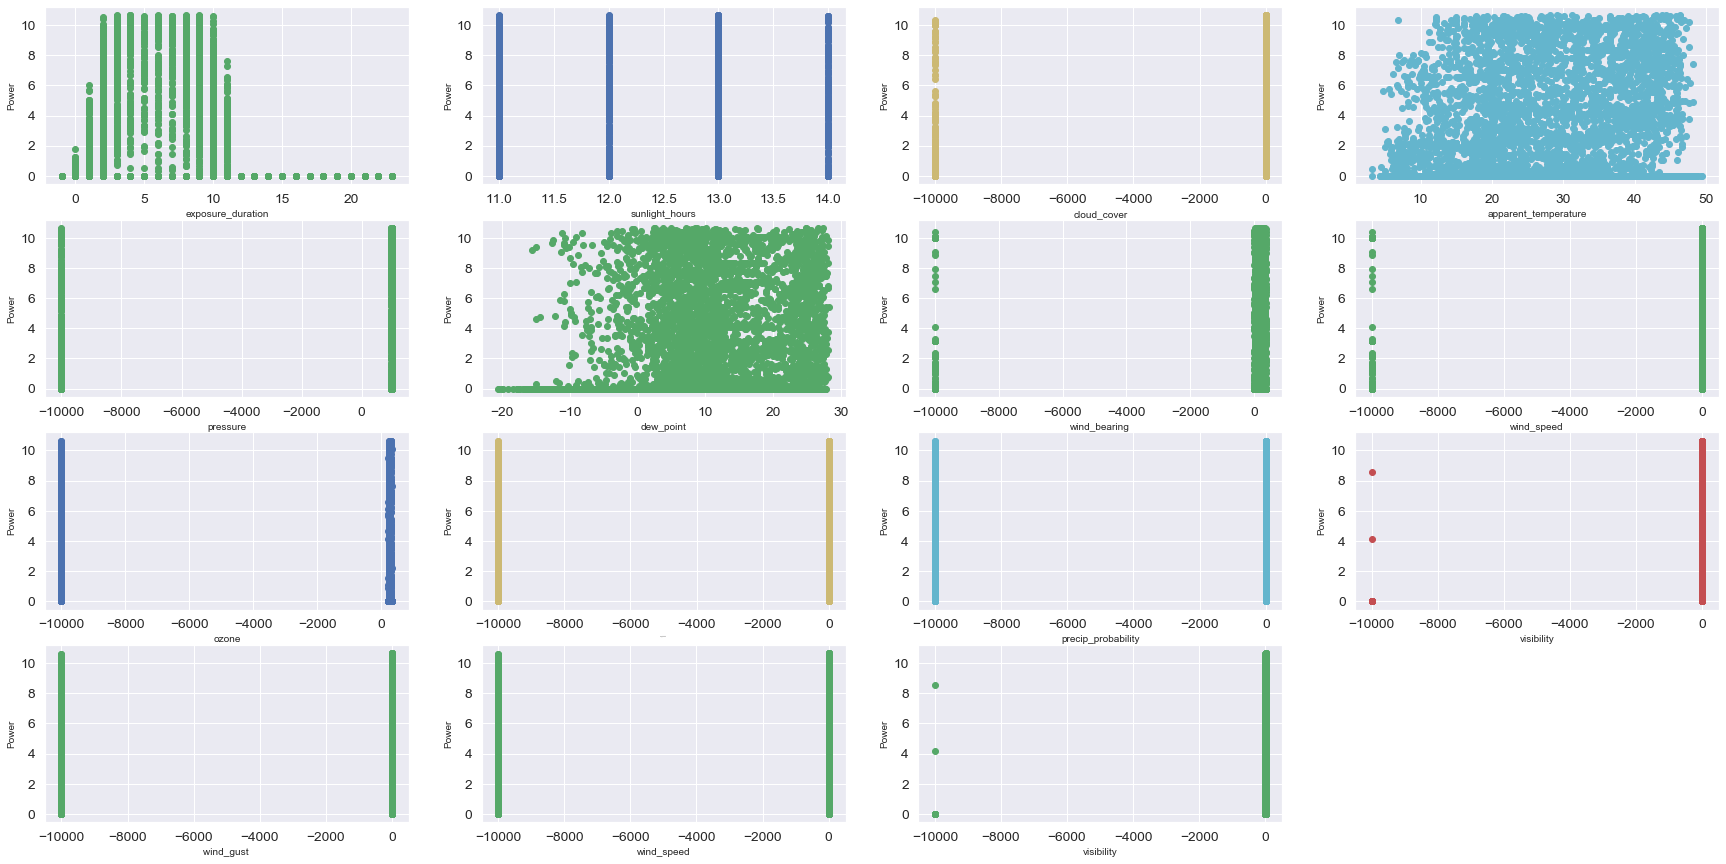

In [257]:
plt.figure(figsize=(30,15))
plt.subplot(4,4,1)
plt.scatter(train_data['exposure_duration'] , train_data['power'],c='g')
plt.xlabel("exposure_duration",fontsize=10)
plt.ylabel("Power",fontsize=10)                                                        

plt.subplot(4,4,2)
plt.scatter(train_data['sunlight_hours'] , train_data['power'],c='b')
plt.xlabel("sunlight_hours",fontsize=10)
plt.ylabel("Power",fontsize=10)


plt.subplot(4,4,3)
plt.scatter(train_data['cloud_cover'] , train_data['power'] , c='y')
plt.xlabel('cloud_cover',fontsize=10)
plt.ylabel("Power",fontsize=10)

plt.subplot(4,4,4)
plt.scatter(train_data['apparent_temperature'] , train_data['power'], c='c')
plt.xlabel("apparent_temperature",fontsize=10)
plt.ylabel("Power",fontsize=10)

plt.subplot(4,4,5)
plt.scatter(train_data['pressure'] , train_data['power'],c='g')
plt.xlabel("pressure",fontsize=10)
plt.ylabel("Power",fontsize=10)

plt.subplot(4,4,6)
plt.scatter(train_data['dew_point'] , train_data['power'],c='g')
plt.xlabel("dew_point",fontsize=10)
plt.ylabel("Power",fontsize=10)


plt.subplot(4,4,7)
plt.scatter(train_data['wind_bearing'] , train_data['power'],c='g')
plt.xlabel("wind_bearing",fontsize=10)
plt.ylabel("Power",fontsize=10)


plt.subplot(4,4,8)
plt.scatter(train_data['wind_speed'] , train_data['power'],c='g')
plt.xlabel("wind_speed",fontsize=10)
plt.ylabel("Power",fontsize=10)

plt.subplot(4,4,9)
plt.scatter(train_data['ozone'] , train_data['power'],c='b')
plt.xlabel("ozone",fontsize=10)
plt.ylabel("Power",fontsize=10)


plt.subplot(4,4,10)
plt.scatter(train_data['precip_intensity'] , train_data['power'] , c='y')
plt.xlabel('precip_intensity',fontsize=1)
plt.ylabel("Power",fontsize=10)

plt.subplot(4,4,11)
plt.scatter(train_data['precip_probability'] , train_data['power'], c='c')
plt.xlabel("precip_probability",fontsize=10)
plt.ylabel("Power",fontsize=10)

plt.subplot(4,4,12)
plt.scatter(train_data['visibility'] , train_data['power'] ,c='r')
plt.xlabel("visibility",fontsize=10)
plt.ylabel("Power",fontsize=10)

plt.subplot(4,4,13)
plt.scatter(train_data['wind_gust'] , train_data['power'],c='g')
plt.xlabel("wind_gust ",fontsize=10)
plt.ylabel("Power",fontsize=10)


plt.subplot(4,4,14)
plt.scatter(train_data['uv_index'] , train_data['power'],c='g')
plt.xlabel("wind_speed",fontsize=10)
plt.ylabel("Power",fontsize=10)


plt.subplot(4,4,15)
plt.scatter(train_data['visibility'] , train_data['power'],c='g')
plt.xlabel("visibility",fontsize=10)
plt.ylabel("Power",fontsize=10)

plt.show()


# Data Visualization

In [ ]:
sns.pairplot(train_data, hue = 'power')

C:\Users\Ramyavepuri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ramyavepuri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ramyavepuri\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Ramyavepuri\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


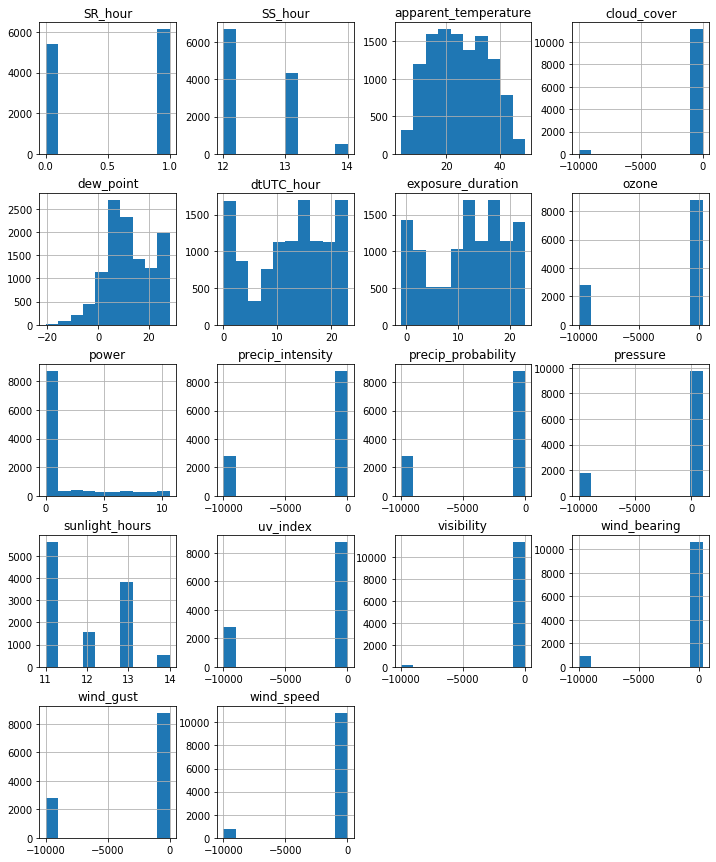

In [81]:
train_data.hist(figsize = (12,15))
plt.show()

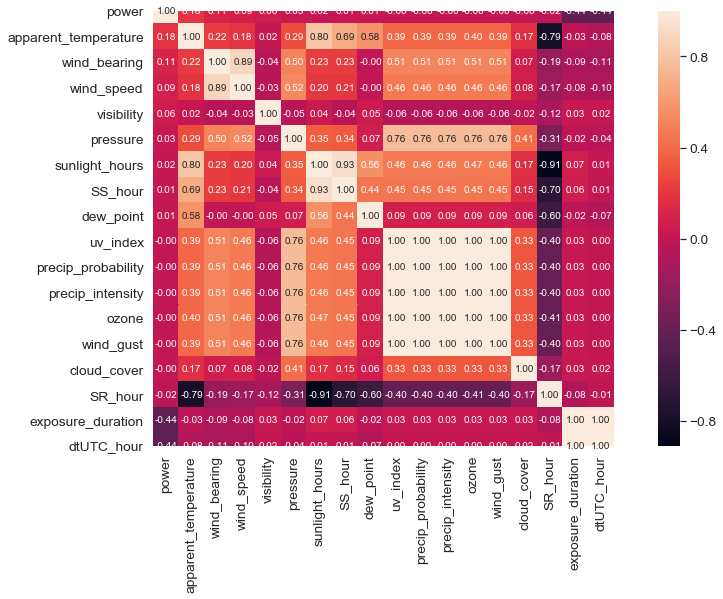

In [82]:
#saleprice correlation matrix
k = 20 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train_data.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'power')['power'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

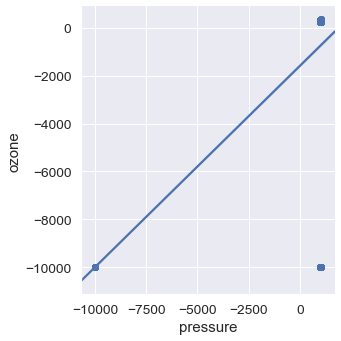

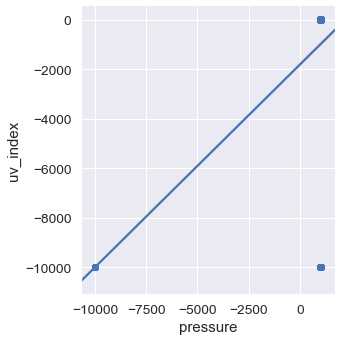

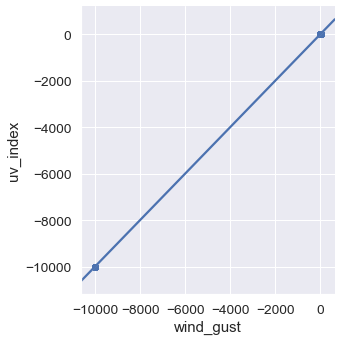

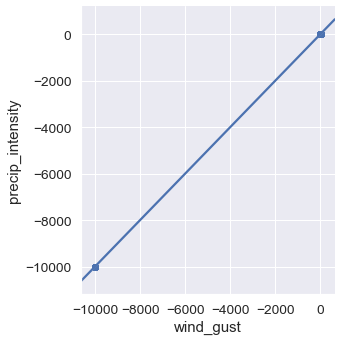

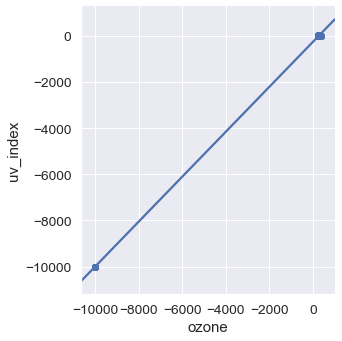

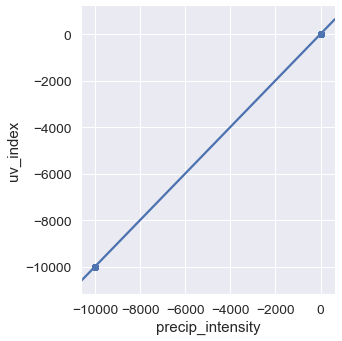

In [83]:

sns.lmplot(x='pressure',y='ozone',data=train_data) 

sns.lmplot(x='pressure',y='uv_index',data=train_data)

sns.lmplot(x='wind_gust',y='uv_index',data=train_data)

sns.lmplot(x='wind_gust',y='precip_intensity',data=train_data)

sns.lmplot(x='ozone',y='uv_index',data=train_data) 

sns.lmplot(x='precip_intensity',y='uv_index',data=train_data) 


In [84]:
plt.show()

Actually when the high correlation occurs we have to remove the features but if we remove these feature there will be less features to predict so i am going for PCA technique.

# Pre-Modelling Data Processing

In [85]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#train_data[categorical_cols] = train_data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [86]:
C_icon = pd.get_dummies(train_data['icon'],drop_first=True)
train_data['icon'] = pd.factorize(train_data['icon'])[0]

In [87]:
train_data = pd.concat([train_data , C_icon ], axis=1)

In [88]:
train_data.columns

Index(['power', 'datetime_utc', 'cloud_cover', 'apparent_temperature',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'sunrise', 'sunset', 'icon', 'summary', 'dtUTC_hour',
       'SR_hour', 'SS_hour', 'sunlight_hours', 'exposure_duration',
       'clear-night', 'cloudy', 'fog', 'partly-cloudy-day',
       'partly-cloudy-night', 'rain', 'wind'],
      dtype='object')

In [89]:
train_data.drop(['icon'], axis=1, inplace=True)

In [90]:
#The labelEncoder works on only categorical features. We need first to extract the categorial featuers using boolean mask.
# Categorical boolean mask
categorical_feature_mask = train_data.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = train_data.columns[categorical_feature_mask].tolist()

In [91]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_data[categorical_cols] = train_data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

# Scaling the features

In [92]:
train_data.columns

Index(['power', 'datetime_utc', 'cloud_cover', 'apparent_temperature',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'sunrise', 'sunset', 'summary', 'dtUTC_hour', 'SR_hour',
       'SS_hour', 'sunlight_hours', 'exposure_duration', 'clear-night',
       'cloudy', 'fog', 'partly-cloudy-day', 'partly-cloudy-night', 'rain',
       'wind'],
      dtype='object')

In [93]:
train_data.dtypes

power                          float64
datetime_utc            datetime64[ns]
cloud_cover                    float64
apparent_temperature           float64
dew_point                      float64
wind_bearing                     int64
wind_speed                     float64
wind_gust                      float64
pressure                       float64
uv_index                         int64
ozone                          float64
precip_intensity               float64
precip_probability             float64
visibility                     float64
sunrise                 datetime64[ns]
sunset                  datetime64[ns]
summary                          int32
dtUTC_hour                       int64
SR_hour                          int64
SS_hour                          int64
sunlight_hours                   int64
exposure_duration                int64
clear-night                      uint8
cloudy                           uint8
fog                              uint8
partly-cloudy-day        

In [94]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()


numericals = ['power','cloud_cover','apparent_temperature','dew_point','wind_bearing','wind_speed','wind_gust',\
           'pressure','uv_index','ozone','precip_intensity','precip_probability','visibility','dtUTC_hour',\
            'SR_hour', 'SS_hour','exposure_duration','sunlight_hours']

train_data[numericals] = scaler.fit_transform(train_data[numericals])

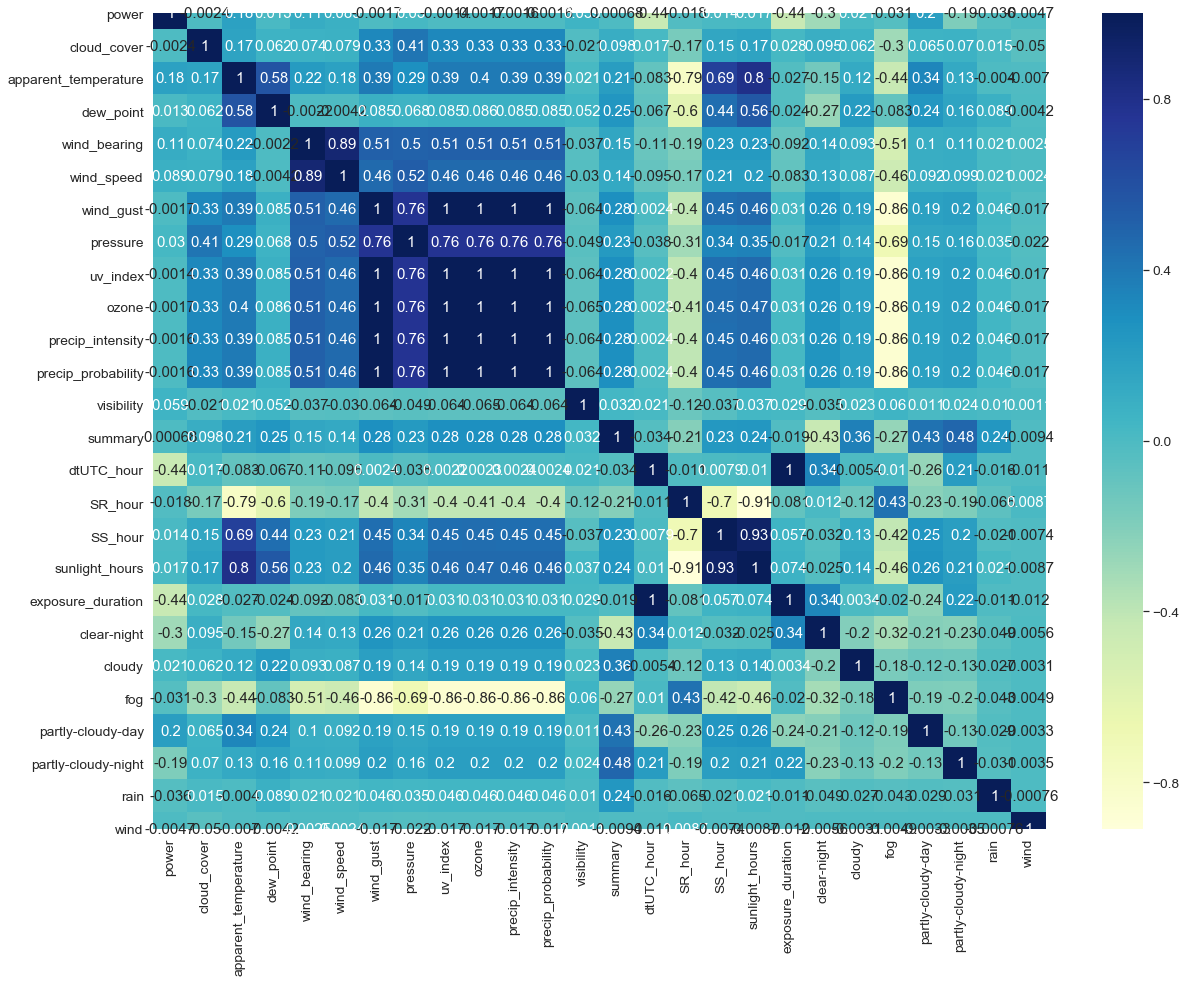

In [95]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [96]:
train = train_data


In [97]:
train

,power,datetime_utc,cloud_cover,apparent_temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,SS_hour,sunlight_hours,exposure_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
0,-0.503017,2017-09-30 18:30:00,0.184310,0.138874,0.818233,0.338123,0.259428,-1.781706,0.428597,-1.781706,...,-0.797938,0.06763,0.860016,1,0,0,0,0,0,0
1,-0.503017,2017-09-30 19:30:00,0.184310,0.355396,0.883782,-3.415525,-3.844030,-1.781706,-2.331714,-1.781706,...,-0.797938,0.06763,1.000567,0,0,1,0,0,0,0
2,-0.503017,2017-09-30 20:30:00,0.184310,0.144622,0.873949,-3.415525,-3.844030,-1.781706,-2.331714,-1.781706,...,-0.797938,0.06763,1.141117,0,0,1,0,0,0,0
3,-0.503017,2017-09-30 21:30:00,0.184310,-0.117886,0.730834,0.324284,0.259272,-1.781706,0.428652,-1.781706,...,-0.797938,0.06763,1.281668,1,0,0,0,0,0,0
4,-0.503017,2017-09-30 22:30:00,0.184310,-0.090102,0.641250,-3.415525,-3.844030,-1.781706,-2.331714,-1.781706,...,-0.797938,0.06763,1.422218,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,-0.503017,2019-09-30 13:30:00,0.184400,0.631317,1.007232,0.240522,0.260203,0.561331,0.428481,0.561018,...,-0.797938,0.06763,0.157264,0,0,0,0,1,0,0
13615,-0.503017,2019-09-30 14:30:00,0.184400,0.512517,1.024712,0.247441,0.260417,0.561533,0.428684,0.561018,...,-0.797938,0.06763,0.297814,0,0,0,0,1,0,0
13616,-0.503017,2019-09-30 15:30:00,0.184411,0.430124,1.053117,0.253633,0.260458,0.561622,0.428785,0.561018,...,-0.797938,0.06763,0.438365,0,0,0,0,1,0,0
13617,-0.503017,2019-09-30 16:30:00,0.184479,0.373599,1.094631,0.258003,0.260409,0.561598,0.428812,0.561018,...,-0.797938,0.06763,0.578915,0,0,0,0,1,0,0


In [98]:
train.drop(['datetime_utc','sunset','sunrise'], axis=1, inplace=True)

As i cant take datetime input to minmaxscaler i dropped them.

In [99]:
X1 = train.drop(['power'],axis=1)
Y1 = train.power

In [100]:
#X1 = train_new.pop('power')
#Y1 = train_new.power

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1=scaler.fit_transform(X1)

**PCA**

In [102]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X1)

In [103]:
pca.get_covariance()

array([[ 3.18169836e-02,  6.65045374e-03,  2.07901268e-03,
         3.49137465e-03,  3.44023283e-03,  2.49971110e-02,
         2.67179223e-02,  2.49968460e-02,  2.48371257e-02,
         2.50088559e-02,  2.50224832e-02, -4.53363175e-04,
         3.83343980e-03,  9.25054455e-04, -1.48774060e-02,
         7.64841517e-03,  1.00580788e-02,  1.50640244e-03,
         7.52176955e-03,  3.34297500e-03, -2.23773378e-02,
         3.67925305e-03,  4.14565995e-03,  2.16260867e-04,
        -8.35154493e-05],
       [ 6.65045374e-03,  5.07825992e-02,  2.45875643e-02,
         1.29926883e-02,  1.00658119e-02,  3.79349059e-02,
         2.35951885e-02,  3.79367983e-02,  3.77608692e-02,
         3.79428521e-02,  3.79632105e-02,  5.78856714e-04,
         1.02331823e-02, -5.77119247e-03, -8.93721960e-02,
         4.54466952e-02,  6.00885288e-02, -1.80688462e-03,
        -1.44756256e-02,  8.44613045e-03, -4.06427202e-02,
         2.38001316e-02,  9.59153848e-03, -7.35271637e-05,
        -1.46371289e-05],
    

In [104]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.97376420e-01, 1.38266685e-01, 9.57407241e-02, 6.42243298e-02,
       4.04740042e-02, 3.58852783e-02, 3.10678766e-02, 1.93066818e-02,
       1.89667652e-02, 1.51629249e-02, 1.12268170e-02, 8.48961617e-03,
       7.37768793e-03, 5.05563973e-03, 4.20789149e-03, 3.71176172e-03,
       2.53711709e-03, 8.88942109e-04, 3.24691348e-05, 3.53458732e-07,
       1.06087100e-08, 4.39260898e-09, 5.63154647e-11, 5.23752648e-33,
       2.86321466e-33])

In [105]:
pca=PCA(n_components=25)
X_new=pca.fit_transform(X1)

Now PCA was fit for the training data

In [106]:
X_new.shape

(11580, 25)

In [107]:
Y1.shape

(11580,)

In [109]:
from sklearn.model_selection import train_test_split

## Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_new, Y1, test_size=0.3)

In [110]:
print('The shape of training_x variable is :',X_train.shape)
print('The shape of training_y variable is :',y_train.shape)
print('The shape of validation_X variable is :',X_test.shape)
print('The shape of validation_y variable is :',y_test.shape)

The shape of training_x variable is : (8106, 25)
The shape of training_y variable is : (8106,)
The shape of validation_X variable is : (3474, 25)
The shape of validation_y variable is : (3474,)


# Modelling

In [111]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

 **Linear Regression**

In [112]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [113]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [114]:
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()
lm.fit(X_train, y_train)
Y_pred_test = lm.predict(X_test)
response_comp = {'Y_test':y_test.reshape(-1,), 'Y_pred_test':Y_pred_test.reshape(-1,)}
pd.DataFrame(response_comp)

,Y_test,Y_pred_test
0,-0.508857,-0.443307
1,-0.508857,-0.638983
2,-0.508857,-0.059545
3,-0.508857,-0.034733
4,-0.508857,-0.424272
...,...,...
3469,-0.508857,-0.621489
3470,-0.508857,-0.334841
3471,-0.508857,-0.638917
3472,-0.508857,-0.595656


# Model Evaluation

In [123]:
# print the intercept
print(lm.intercept_)

[-2.56952274e-17]


In [124]:
print(lm.coef_)

[[ 0.00073183 -0.16237482 -0.41881082 -0.20514206  0.00699774 -0.04743636
   0.01766794 -0.01390127  0.06859062 -0.09159622  0.20215327  0.02517038
   0.03211668 -0.08596173 -0.06838246  0.07857824 -0.03064696 -0.06753258
  -0.01455089 -0.02061109 -0.12136795  0.2117985  -0.00418782 -0.00851233
   0.00629119]]


In [125]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

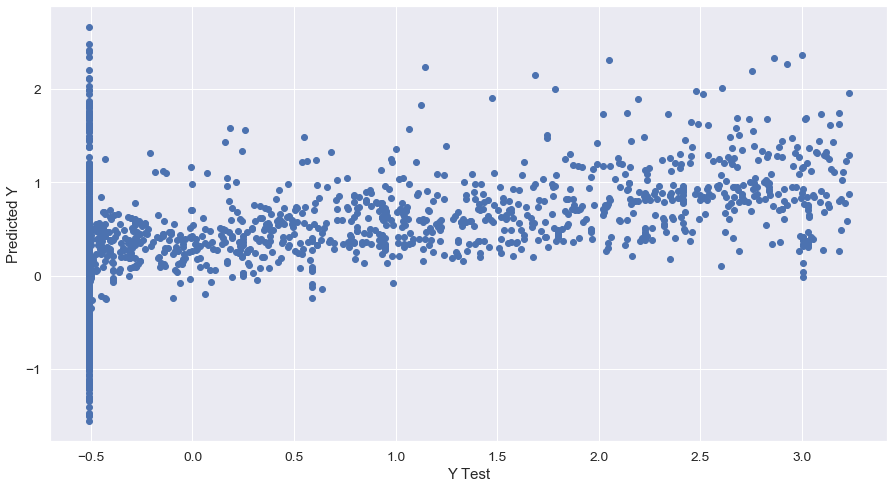

In [126]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

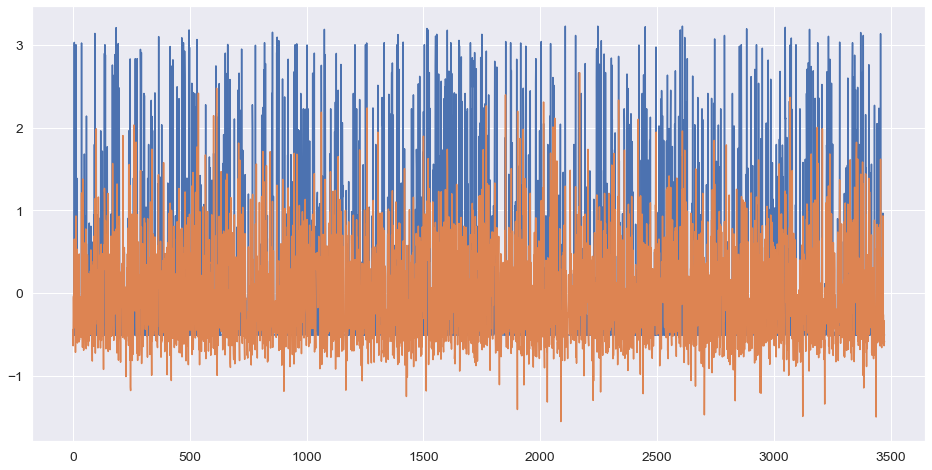

In [127]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [128]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5236763182568468
MSE: 0.5881169251727748
RMSE: 0.766887817853938


**Forecast data set**

In [129]:
Forecast_weather.columns

Index(['datetime_utc', 'datetime_local', 'cloud_cover', 'apparent_temperature',
       'temperature', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust',
       'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'visibility', 'sunrise', 'sunset', 'icon',
       'summary', 'updated_at', 'dtUTC_hour', 'SR_hour', 'SS_hour',
       'sunlight_hours', 'exposure_duration'],
      dtype='object')

In [130]:
Forecast_weather.drop(['datetime_local','sunrise','sunset','datetime_utc'] ,axis=1 , inplace=True)

In [131]:
Forecast_weather.icon.value_counts()

clear-night            265
clear-day              225
partly-cloudy-day       64
partly-cloudy-night     64
cloudy                  30
Name: icon, dtype: int64

**Encoding Categorical values**

In [133]:
climate = pd.get_dummies(Forecast_weather['icon'],drop_first=True)

In [134]:
Forecast_weather = pd.concat([Forecast_weather , climate ], axis=1)

In [135]:
Forecast_weather.drop(['icon','summary'], axis=1, inplace=True)

In [147]:
Forecast_weather.drop(['updated_at'], axis=1, inplace=True)

In [148]:
Forecast_weather.head()

,cloud_cover,apparent_temperature,temperature,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,...,visibility,dtUTC_hour,SR_hour,SS_hour,sunlight_hours,exposure_duration,clear-night,cloudy,partly-cloudy-day,partly-cloudy-night
0,0.767213,-0.250906,26,1.998152,-0.371283,1.144739,1.930617,-1.523428,-0.649491,-2.228805,...,0.0,0.939010,-0.894427,0.0,0.894427,1.000641,0,-0.220326,0,1
1,1.059958,-0.351058,25,2.011988,-0.336970,0.959546,1.839240,-1.630780,-0.649491,-2.073821,...,0.0,1.083473,-0.894427,0.0,0.894427,1.144733,0,-0.220326,0,1
2,1.242923,-0.457741,25,2.011988,-0.328392,0.800809,1.708702,-1.804588,-0.649491,-1.887840,...,0.0,1.227936,-0.894427,0.0,0.894427,1.288825,0,-0.220326,0,1
3,1.279516,-0.601437,24,1.959411,-0.328392,0.549476,1.486787,-1.952835,-0.649491,-1.670862,...,0.0,1.372399,-0.894427,0.0,0.894427,1.432917,0,-0.220326,0,1
4,1.279516,-0.777791,23,1.865325,-0.379861,0.232002,1.199602,-2.003955,-0.649491,-1.391891,...,0.0,1.516862,-0.894427,0.0,0.894427,1.577010,0,-0.220326,0,1


In [149]:
Forecast_test = Forecast_weather

In [150]:
Forecast_test.columns

Index(['cloud_cover', 'apparent_temperature', 'temperature', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility',
       'dtUTC_hour', 'SR_hour', 'SS_hour', 'sunlight_hours',
       'exposure_duration', 'clear-night', 'cloudy', 'partly-cloudy-day',
       'partly-cloudy-night'],
      dtype='object')

In [140]:
scaler= StandardScaler()

num_vars = ['cloudy','cloud_cover','apparent_temperature','dew_point','wind_bearing','wind_speed','wind_gust',\
           'pressure','uv_index','ozone','precip_intensity','precip_probability','visibility','dtUTC_hour', 'SR_hour', 'SS_hour', 'sunlight_hours','exposure_duration']

Forecast_test[num_vars] = scaler.fit_transform(Forecast_test[num_vars])

In [151]:
X2 = Forecast_test

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2=scaler.fit_transform(X2)

In [153]:
from sklearn.decomposition import PCA
pca = PCA()
X_new2 = pca.fit_transform(X2)

In [154]:
pca.get_covariance()

array([[ 7.47949387e-02,  1.01633299e-02,  7.10574075e-03,
         2.08569660e-02,  1.08056376e-02,  6.43410837e-03,
         1.47585925e-03, -4.26181983e-03,  4.46869574e-03,
        -4.19422011e-03,  4.52648206e-03,  1.14571606e-02,
         9.15967587e-19, -9.23392245e-03, -5.05993474e-02,
        -1.24216584e-19,  5.05993474e-02, -6.74086954e-03,
        -5.47140172e-02,  3.79595283e-02,  4.26402961e-02,
         2.06773904e-02],
       [ 1.01633299e-02,  6.49228973e-02,  6.35854203e-02,
        -6.61353591e-03,  1.11448909e-02,  1.76311290e-02,
        -4.53700395e-03, -1.32203178e-02,  4.66903367e-02,
         3.88467401e-03,  2.50291327e-03,  3.02407173e-03,
        -7.63647235e-19, -2.57457686e-02, -2.65687942e-02,
         1.40306764e-19,  2.65687942e-02, -2.35659952e-02,
        -6.25899215e-02,  1.00817647e-03,  2.17715516e-02,
        -9.27571751e-03],
       [ 7.10574075e-03,  6.35854203e-02,  6.34777608e-02,
        -1.03222105e-02,  1.27767871e-02,  1.75960104e-02,
    

In [155]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([3.29931507e-01, 2.47304730e-01, 9.01750731e-02, 6.71495084e-02,
       6.33668605e-02, 5.34737686e-02, 3.75522978e-02, 2.99374712e-02,
       2.44965119e-02, 1.66689650e-02, 1.10644692e-02, 8.84775979e-03,
       8.09007991e-03, 5.63976840e-03, 3.22917695e-03, 1.77303592e-03,
       1.12265841e-03, 1.76358375e-04, 1.38933395e-32, 6.32648374e-33,
       3.63720464e-35, 7.68636216e-36])

In [157]:
pca=PCA(n_components=22)
X_new2=pca.fit_transform(X2)

In [161]:
X_train.shape

(8106, 25)

In [162]:
X_new2.shape

(648, 22)

In [163]:
missing_columns = np.subtract(X_train,X_new2)

ValueError: operands could not be broadcast together with shapes (8106,25) (648,22) 

AttributeError: 'numpy.ndarray' object has no attribute 'columns'